In [4]:
import argparse
from argparse import RawTextHelpFormatter
import glob
from os import makedirs
from os.path import join, exists, basename, splitext
# 3p
import cv2
from tqdm import tqdm
# project
from exposure_enhancement import enhance_image_exposure
import numpy as np
from scipy import fft
from skimage import io, exposure, img_as_ubyte, img_as_float
from tqdm import trange
import matplotlib.pyplot as plt
import argparse
import os
from PIL import Image
import shutil
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
input_image_path = 'sample images/15.jpg'


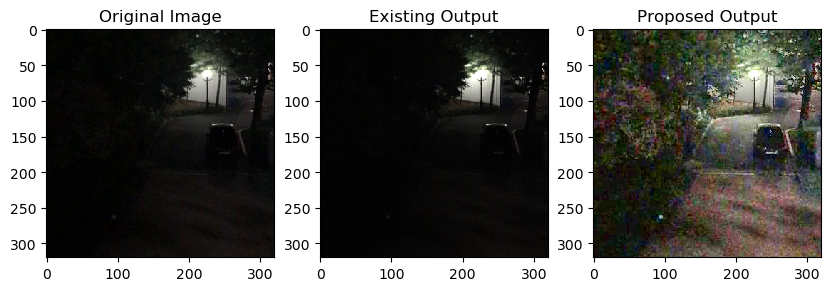

In [6]:
# Existing
brightness_alpha=1.2
contrast_beta=10
gamma=1.5
img = cv2.imread(input_image_path)
enhanced_brightness = cv2.convertScaleAbs(img, alpha=brightness_alpha, beta=0)
enhanced_contrast = cv2.addWeighted(enhanced_brightness, 1, img, 0, contrast_beta)
enhanced_img1 = np.power(enhanced_contrast / 255.0, gamma)
enhanced_img1 = np.uint8(enhanced_img1 * 255)
    
# proposed
enhanced_img2 = enhance_image_exposure(img, 0.6, 0.15,"lime")    

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title('Existing Output')

plt.subplot(133)
plt.imshow(cv2.cvtColor(enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title('Proposed Output')

plt.show()

In [7]:
def compute_metrics(original, enhanced):
    psnr_value = psnr(original, enhanced)
    
    # Explicitly set win_size to a suitable value
    win_size = 3  # You can adjust this value based on your image size

    # Calculate SSIM with the explicit win_size parameter
    ssim_value, _ = ssim(original, enhanced, full=True, win_size=win_size)

    mse_value = mean_squared_error(original.flatten(), enhanced.flatten())

    return psnr_value, ssim_value, mse_value

In [8]:
psnr_existing, ssim_existing, mse_existing = compute_metrics(img, enhanced_img2)
psnr_proposed, ssim_proposed, mse_proposed = compute_metrics(img, enhanced_img1)

print("Metrics for Existing Enhancement:")
print("PSNR:", psnr_existing)
print("SSIM:", ssim_existing)
print("MSE:", mse_existing)

print("\nMetrics for Proposed Enhancement:")
print("PSNR:", psnr_proposed)
print("SSIM:", ssim_proposed)
print("MSE:", mse_proposed)

Metrics for Existing Enhancement:
PSNR: 12.585362771142671
SSIM: 0.16690270395583295
MSE: 109.71591145833334

Metrics for Proposed Enhancement:
PSNR: 32.459691798502845
SSIM: 0.916126318561757
MSE: 28.41220703125
